In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## When to use Uniform Distribution?

Use it when **rank** matters more than **actual value**:

* **Neutralize Outliers:** Prevents a few extreme values from dominating the data.
* **Equalize Feature Importance:** Equal percentile shifts carry equal weight across the range.
* **Non-Parametric Models:** Better suited for **KNN**, **SVMs**, and **Neural Networks**.
* **Maximize Information Spread:** Fills the entire range evenly, no "empty spaces."

---

## What do we do after the Transformation?

* **Feature Concatenation:** Combine the uniform feature with other scaled features into a balanced input vector.
* **Distance Calculation:** Feeds into **KNN/Clustering** — uniform data makes distance density-based, improving cluster accuracy.
* **Neural Network Training:** Prevents **gradient saturation**, enabling faster convergence.
* **Performance Comparison:** Compare **MSE** or **R²** against raw-data models to validate the improvement.
* **Inverse Transformation:** Use `transformer.inverse_transform()` to convert predictions back to the original scale.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer


In [ ]:
file_path = '/content/drive/MyDrive/ratings.dat'
ratings = pd.read_csv(file_path, sep='::', engine='python', header=None,
                           names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

movie_counts = (
    ratings.groupby("MovieID")
    .size()
    .reset_index(name="num_ratings")
)


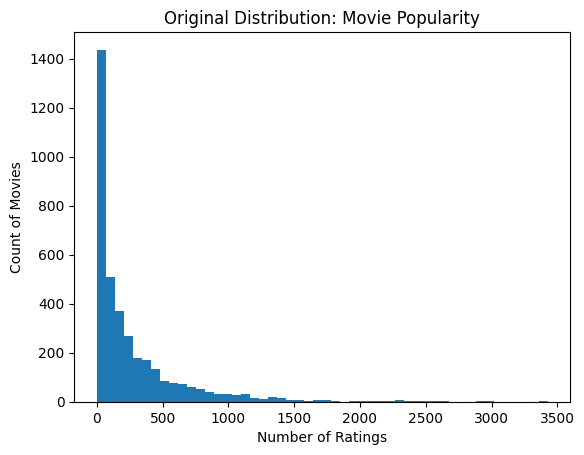

In [ ]:
plt.hist(movie_counts["num_ratings"], bins=50)
plt.title("Original Distribution: Movie Popularity")
plt.xlabel("Number of Ratings")
plt.ylabel("Count of Movies")
plt.show()


In [ ]:
qt = QuantileTransformer(
    output_distribution="uniform",
    random_state=42
)

movie_counts["num_ratings_uniform"] = qt.fit_transform(
    movie_counts[["num_ratings"]]
)


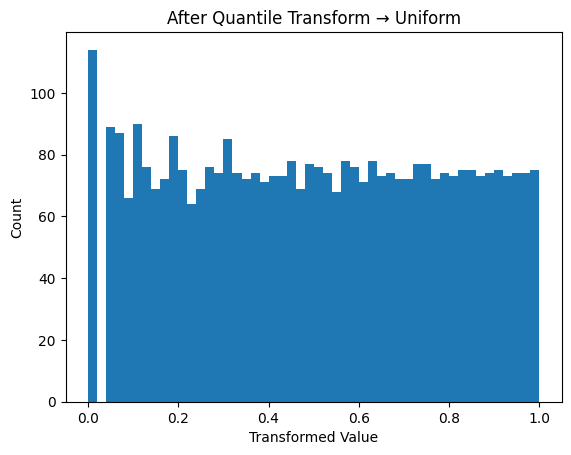

In [ ]:
plt.hist(movie_counts["num_ratings_uniform"], bins=50)
plt.title("After Quantile Transform → Uniform")
plt.xlabel("Transformed Value")
plt.ylabel("Count")
plt.show()
